<a href="https://colab.research.google.com/github/Xavier-ML/Computational-Physics-with-Python/blob/main/07d_Mutidimensional_3_body_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional differential equations

- Börge Göbel 

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import integrate

# 3-body problem

In [18]:
# Constants in SI units

# Gravitational constant
G = 6.67430*10**(-11) # m^3 / ( kg * s^2 )

# Masses
msun = 1.9884 * 10**30 # kg
mearth = 5.9723 * 10**24 # kg
mmoon = 7.349 * 10**22 # kg

# Distances (average)
rSunEarth = 1.4960 * 10**11 # m
rEarthMoon = 3.850 * 10**8 # m

# Velocities (average)
vEarth = 29780 # m/s (Trajectory around sun)
vMoon = 1022 # m/s (Trajectory around earth)

## A) Sun, Earth & Moon

Variables for each of the 3 bodies: \\(x, y, z, v_x, v_y, v_z\\)

Force: Newton's law of gravitation 

\begin{equation}
( \vec{F} =G\frac{m_1m_2}{|\vec{r}_0-\vec{r}|^3}(\vec{r}_0-\vec{r}) = -G\frac{m_1m_2}{r^2}\vec{e}_r\end{equation} for \begin{equation} \vec{r}_0=0\end{equation}

For the three bodies

\begin{equation}
( m_1\ddot{\vec{r}_1}=
G\frac{m_1m_2}{|\vec{r}_2-\vec{r}_1|^3}(\vec{r}_2-\vec{r}_1) + G\frac{m_1m_3}{|\vec{r}_3-\vec{r}_1|^3}(\vec{r}_3-\vec{r}_1)\\
m_2\ddot{\vec{r}_2}=
G\frac{m_2m_1}{|\vec{r}_1-\vec{r}_2|^3}(\vec{r}_1-\vec{r}_2) + G\frac{m_2m_3}{|\vec{r}_3-\vec{r}_2|^3}(\vec{r}_3-\vec{r}_2)\\
m_3\ddot{\vec{r}_3}=
G\frac{m_3m_1}{|\vec{r}_1-\vec{r}_3|^3}(\vec{r}_1-\vec{r}_3) + G\frac{m_3m_2}{|\vec{r}_2-\vec{r}_3|^3}(\vec{r}_2-\vec{r}_3)
\end{equation}

We have the solve the following differential equations

\begin{equation} \ddot{\vec{r}_1}=
-G\left(\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\right)\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_1|^3}\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_1|^3}\vec{r}_3\\
\ddot{\vec{r}_2}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}\vec{r}_1 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_2|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\right)\vec{r}_2 + G\frac{m_3}{|\vec{r}_3-\vec{r}_2|^3}\vec{r}_3\\
\ddot{\vec{r}_3}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\vec{r}_2 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_3|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_3|^3}\right)\vec{r}_3
\end{equation}

In [19]:
m1 = msun
m2 = mearth
m3 = mmoon

def f_ODE(t,r):
    r1 = r[0:3]
    r2 = r[3:6]
    r3 = r[6:9]
    #v1 = r[9:12]
    r12 = np.linalg.norm(r1-r2)
    r23 = np.linalg.norm(r2-r3)
    r31 = np.linalg.norm(r3-r1)
    eqr = G*np.array([
        -(m2/r12**3 + m3/r31**3)*r1 + m2/r12**3 * r2 + m3/r31**3 * r3,
        m1/r12**3 * r1 - (m1/r12**3 + m3/r23**3)*r2 + m3/r23**3 * r3,
        m1/r31**3 * r1 + m2/r23**3 * r2 -(m1/r31**3 + m2/r23**3)*r3
    ])
    return np.concatenate([r[9:18], eqr.flatten() ])

In [20]:
#sun

r1start = np.array([0,0,0])
v1start = np.array([0,0,0])

# earth
r2start = np.array([rSunEarth,0,0])
v2start = np.array([0,vEarth,0])

# moon
r3start = np.array([rSunEarth, rEarthMoon, 0])
v3start = np.array([-vMoon, vEarth, 0])

r0 = np.concatenate([r1start, r2start, r3start, v1start, v2start, v3start])

In [21]:
f_ODE(0,r0)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.97800000e+04,  0.00000000e+00, -1.02200000e+03,  2.97800000e+04,
        0.00000000e+00,  1.80299923e-08,  5.64021430e-13,  0.00000000e+00,
       -5.92988527e-03,  3.30911997e-05,  0.00000000e+00, -5.92982636e-03,
       -2.70447778e-03,  0.00000000e+00])

In [22]:
tStart = 0

# 1 year = 60*60*24*365.25 seconds
tEnd = 60*60*24*365.25*10.0

solution = integrate.solve_ivp(f_ODE, [tStart, tEnd], r0, method = "RK45", t_eval = np.linspace(tStart,tEnd, 100001), rtol = 0.001e-3,atol = 0.001e-6)

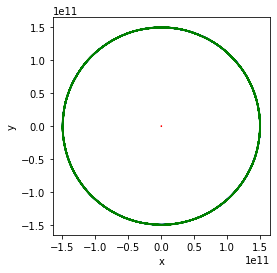

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel("x")
plt.ylabel("y")

plt.plot(solution.y[0], solution.y[1], "red")
plt.plot(solution.y[3], solution.y[4], "blue")
plt.plot(solution.y[6], solution.y[7], "green")

### Sun

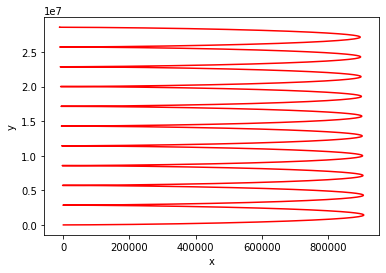

In [24]:
plt.xlabel("x")
plt.ylabel("y")

plt.plot(solution.y[0], solution.y[1], "red")


### Earth

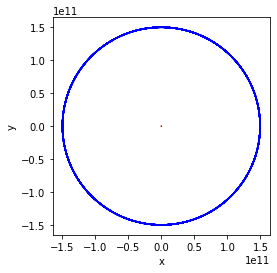

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel("x")
plt.ylabel("y")

plt.plot(solution.y[0], solution.y[1], "red")
plt.plot(solution.y[3], solution.y[4], "blue")

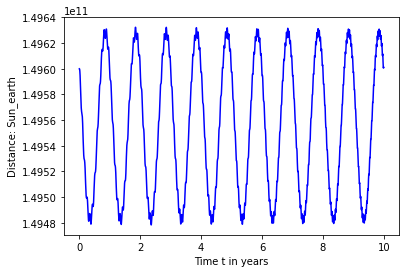

In [26]:
plt.xlabel("Time t in years")
plt.ylabel("Distance: Sun_earth")

plt.plot(solution.t/(60*60*24*365.25), np.linalg.norm(solution.y[0:3]-solution.y[3:6], axis = 0), "blue")

### Moon

### Moon orbit around earth

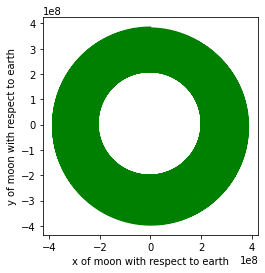

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel("x of moon with respect to earth")
plt.ylabel("y of moon with respect to earth")

plt.plot(solution.y[6]-solution.y[3], solution.y[7]-solution.y[4], "green")

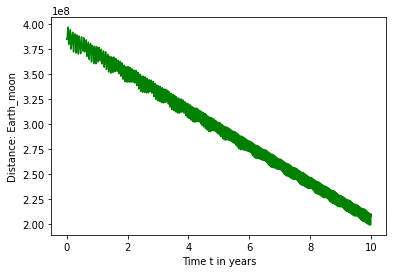

In [31]:
plt.xlabel("Time t in years")
plt.ylabel("Distance: Earth_moon")

plt.plot(solution.t/(60*60*24*365.25), np.linalg.norm(solution.y[3:6]-solution.y[6:9], axis = 0), "green")

### Exaggerate moon orbit radius

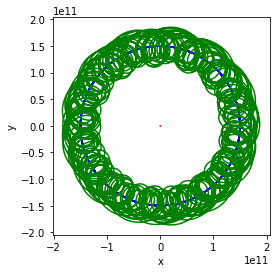

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel("x")
plt.ylabel("y")

plt.plot(solution.y[0], solution.y[1], "red")
plt.plot(solution.y[3], solution.y[4], "blue")
plt.plot(solution.y[3] + 100*(solution.y[6]-solution.y[3]), solution.y[4] + 100*(solution.y[7]-solution.y[4]), "green")

## B) Add a fourth body: Spaceship

Since the mass of the spaceship is so small compared to the other masses, we will disregard the effect on sun, earth and moon. 
The 3 differential equation remain. 

The following equation describes the spaceship

\begin{equation}
m_4\ddot{\vec{r}_4}=
G\frac{m_4m_1}{|\vec{r}_1-\vec{r}_4|^3}(\vec{r}_1-\vec{r}_4) + 
G\frac{m_4m_2}{|\vec{r}_2-\vec{r}_4|^3}(\vec{r}_2-\vec{r}_4) + 
G\frac{m_4m_3}{|\vec{r}_3-\vec{r}_4|^3}(\vec{r}_3-\vec{r}_4)
\end{equation}

We add to our systems of differential equations:

\begin{equation}
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4
\end{equation}

## Analyze trajectory with respect to earth and moon

### a) Elliptical orbit

### b) Direct earth escape

### c) Earth espace via moon encounter

### d) Moon orbit

We have already achieved a trajectory that aproached the moon. In order to reach a stable orbit, we must decrease the relative velocity of the spaceship once it is close to the moon. We will temporarily apply a force that breaks the spaceship relative to the moon.

The fourth differential equation changes to

\begin{equation}
\ddot{\vec{r}_4}=
G\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}\vec{r}_1 + G\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}\vec{r}_2+ G\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\vec{r}_3 -G\left(\frac{m_1}{|\vec{r}_1-\vec{r}_4|^3}+\frac{m_2}{|\vec{r}_2-\vec{r}_4|^3}+\frac{m_3}{|\vec{r}_3-\vec{r}_4|^3}\right)\vec{r}_4 - \frac{F(t)}{m_4}\vec{e_{v_\mathrm{rel}}}
\end{equation}

with 

\begin{equation}
\vec{e_{v_\mathrm{rel}}}=\frac{\dot{\vec{r}}_4-\dot{\vec{r}}_3}{\left|\dot{\vec{r}}_4-\dot{\vec{r}}_3\right|}
\end{equation}